### Tải Java
Đầu tiên tải Java, sau đó tìm tới thư mục có chứa folder bin của Java. VD: `C:\Program Files\Java\jre1.8.0_441`

Sau đó tạo một variable trong system environment và đặt tên là `JAVA_HOME` với value là đường dẫn trên

### Tải PhoNLP và VNCoreNLP

```bash
pip install phonlp
pip install py_vncorenlp
```


### INSTALL MODEL CỦA PHONLP

- Đầu tiên track xem thư mục chưa package phonlp ở đâu. Ví dụ của t là `c:\users\user\appdata\roaming\python\python311\site-packages\phonlp`

- cd đến thư mục này và run `python run_script.py`

- Nó sẽ tải về một model tên là `phonlp.pt`

- Load nó vào bên dưới đây

### INSTALL MODEL CỦA VNCORENLP

- Vô đường dẫn `https://github.com/vncorenlp/VnCoreNLP` clone về. 

- Đoạn ở dưới nhớ chỉnh đường dẫn lại theo đường dẫn thư mục đã clone. Thư mục cần trỏ đến phải có file `VnCoreNLP-1.2.jar`

In [9]:
import phonlp
import py_vncorenlp

In [ ]:
model_path = "C:\\Users\\Admin\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\phonlp"
phonlp_model = phonlp.load(model_path)
model = py_vncorenlp.VnCoreNLP(save_dir = "C:\\Users\\Admin\\Documents\\VnCoreNLP")

In [21]:
sentences = "tôi là sinh viên trường đại học khoa học tự nhiên"

parsed = model.word_segment(sentences)
print(parsed)
parsed_sentence = ""
for item in parsed:
    parsed_sentence += item

['tôi là sinh_viên trường đại_học khoa_học_tự_nhiên']


In [22]:
# Phân tích cú pháp (dependency parsing) bằng phonlp
parsed_result = phonlp_model.annotate(parsed_sentence)

# In kết quả phân tích cú pháp
print("Dependency Parsing Result:")
print(parsed_result)

100%|██████████| 1/1 [00:03<00:00,  3.63s/it]

Dependency Parsing Result:
([['tôi', 'là', 'sinh_viên', 'trường', 'đại_học', 'khoa_học_tự_nhiên']], [[['P'], ['V'], ['N'], ['N'], ['N'], ['N']]], [['O', 'O', 'O', 'O', 'O', 'O']], [[['2', 'sub'], ['0', 'root'], ['2', 'dob'], ['3', 'nmod'], ['4', 'nmod'], ['4', 'nmod']]])


In [23]:
import networkx as nx
import matplotlib.pyplot as plt

# Tách dữ liệu từ tuple trả về
words = parsed_result[0][0]  # Danh sách từ trong câu
deps = parsed_result[3][0]  # Quan hệ dependency (từ cha, nhãn quan hệ)


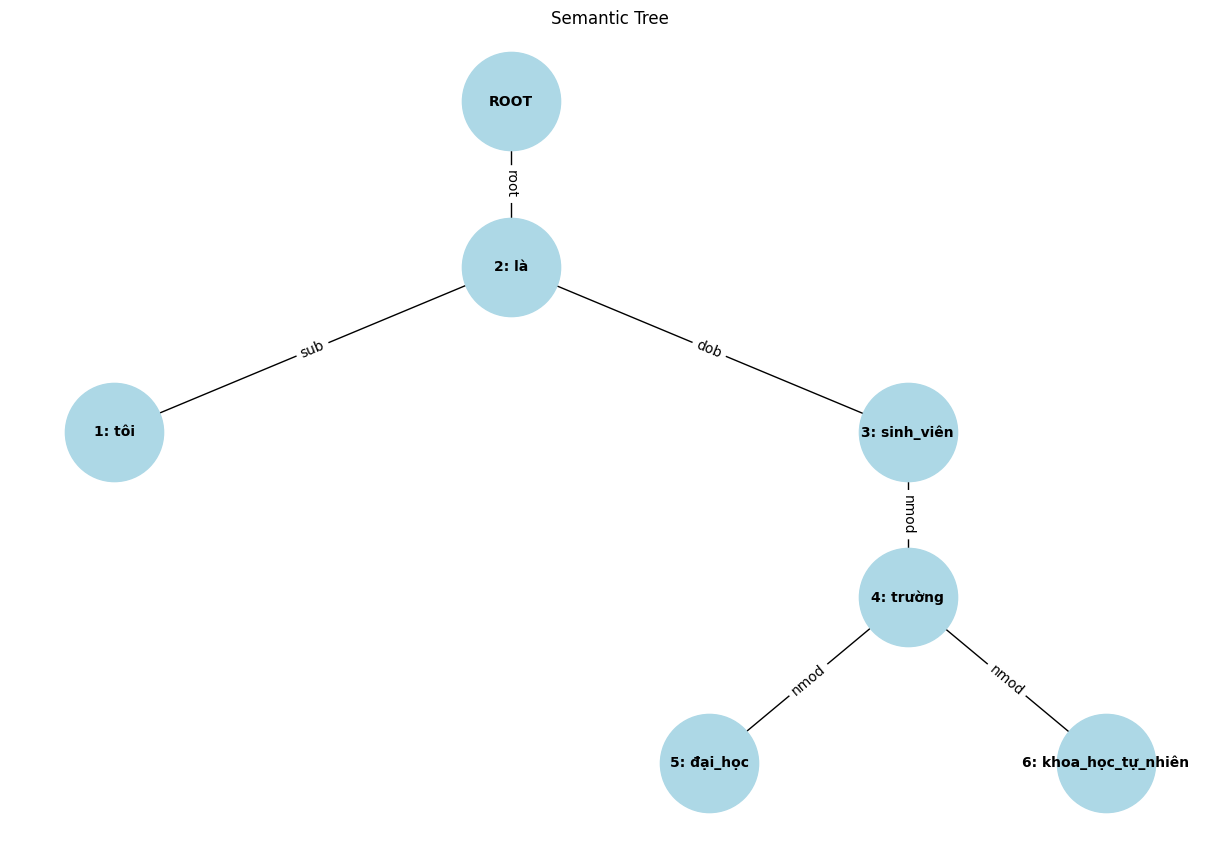

In [ ]:
# Tạo đồ thị có hướng
G = nx.DiGraph()

# Thêm nút cho từng từ với chỉ số (từ 1 đến n)
for i, word in enumerate(words, 1):
    G.add_node(i, label = f"{i}: {word}")

# Thêm nút "ROOT" với chỉ số 0
G.add_node(0, label = "ROOT")

# Thêm các cạnh từ deps
for i, (head_str, rel) in enumerate(deps, 1):
    head = int(head_str)  # Chuyển head từ chuỗi sang số nguyên
    if head == 0:
        # Nếu head là 0, thêm cạnh từ "ROOT" (0) đến từ hiện tại (i)
        G.add_edge(0, i, label = "root")
    else:
        # Ngược lại, thêm cạnh từ head đến từ hiện tại (i) với nhãn rel
        G.add_edge(head, i, label = rel)

# Hàm tính vị trí nút theo kiểu cây (giữ nguyên)
def hierarchy_pos(G, root, width = 1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):
    pos = {}
    pos[root] = (xcenter, vert_loc)
    children = list(G.successors(root))
    if not children:
        return pos
    dx = width / len(children)
    nextx = xcenter - width/2 - dx/2
    for child in children:
        nextx += dx
        pos.update(hierarchy_pos(G, child, width = dx, vert_gap = vert_gap,
                                 vert_loc = vert_loc-vert_gap, xcenter = nextx))
    return pos

# Tính toán vị trí với root là 0 ("ROOT")
pos = hierarchy_pos(G, 0)

# Vẽ cây
labels = nx.get_node_attributes(G, "label")
edge_labels = nx.get_edge_attributes(G, "label")

plt.figure(figsize=(12, 8))
nx.draw(G, pos, labels = labels, with_labels = True, node_size = 5000,
        node_color = "lightblue", font_size = 10, font_weight = "bold", arrows = False)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Semantic Tree")
plt.show()

In [ ]:
def calculate_dependency(parsed_result):
    # Lấy thông tin phụ thuộc
    deps = parsed_result[3][0]
    # Đếm số quan hệ không phải 'punct'
    dependency = sum(1 for dep in deps if dep[1] != 'punct')
    return dependency

def calculate_height(parsed_result):
    # Lấy thông tin phụ thuộc
    deps = parsed_result[3][0]
    # Xây dựng cây dưới dạng từ điển
    from collections import defaultdict
    tree = defaultdict(list)
    for i, (head, _) in enumerate(deps, 1):
        head = int(head)
        if head != 0:  # Không thêm nút gốc vào cây con
            tree[head].append(i)
    
    # Hàm tính độ sâu tối đa từ một nút
    def max_depth(node):
        if not tree[node]:  # Nếu là lá
            return 0
        return 1 + max(max_depth(child) for child in tree[node])
    
    # Tìm nút gốc (head = 0)
    root = next(i for i, (head, _) in enumerate(deps, 1) if head == '0')
    height = max_depth(int(root))
    return height

dependency = calculate_dependency(parsed_result)
height = calculate_height(parsed_result)

print(f"Dependency: {dependency}")
print(f"Height: {height}")